In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy.linalg import inv

In [18]:
def generatePointsWithNoise(w0,w1):
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        gaussian_error=np.random.normal(0,0.04)
        y=w0+w1*x+gaussian_error
        y_coordinates.append(y)
    return x_coordinates,y_coordinates
def generatePoints(w0,w1):
    x_coordinates=np.linspace(start=-1,stop=1,num=10)
    y_coordinates=[]
    for x in x_coordinates:
        y=w0+w1*x
        y_coordinates.append(y)
    return x_coordinates,y_coordinates

In [19]:
x,y=generatePointsWithNoise(-0.3,0.5)
x_true,y_true=generatePoints(-0.3,0.5)

In [20]:
print(x)
print(y)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-0.8592888188843005, -0.7240835166092502, -0.5800218965371461, -0.46234138291316573, -0.35317714520633037, -0.24406775298128253, -0.13329467573719864, -0.04479290535336389, 0.10442046926404468, 0.17781241487888597]


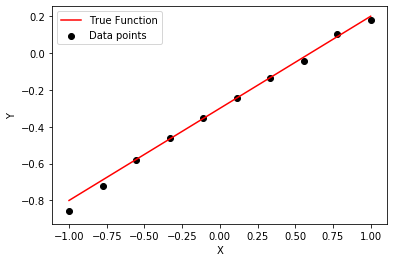

In [21]:
plt.scatter(x,y,color='black',label='Data points')
plt.plot(x_true,y_true,color='red',label='True Function')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [22]:
def gausian_function(x,mean,variance):
  mu=mean
  sigma=math.sqrt(variance)
  y=(1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mu)/sigma)**2)))
  return y

def priorGridCalc(a0_values,a1_values,mean,variance):
    prior_grid=np.zeros((len(a0_values),len(a1_values)))
    for i in range(len(a0_values)):
        for j in range(len(a1_values)):    
            prior_grid[i][j]= multivariate_normal.pdf([a0_values[i],a1_values[j]],[mean,mean], [[variance,0],[0,variance]])
    return prior_grid

In [28]:
def likelihoodGridCalc(a0_values,a1_values,x,y):
    likelihood_grid=np.zeros((len(a0_values),len(a1_values)))
    for i in range(len(a0_values)):
        for j in range(len(a1_values)):    
              for k in range(len(x)):   
                prob=gausian_function(y[k],a0_values[i]+a1_values[j]*x[k],0.04)
                if(k==0):
                  likelihood_grid[i][j]=prob
                else:
                  likelihood_grid[i][j]=likelihood_grid[i][j]*prob
    return likelihood_grid

In [32]:
def posteriorGridCalc(prior_grid,likelihood_grid):
    posterior_grid=likelihood_grid * prior_grid 
    return posterior_grid

In [30]:
a0_values = np.array(np.linspace(-1,1,100));
a1_values = np.array(np.linspace(-1,1,100));

In [31]:
def getRandomLines(m0,s0,beta,phi,t):
    phi = np.array(phi).reshape(1, 2)
    sn = inv(inv(s0) + beta*(np.transpose(phi)@phi))   # @ denotes Matrix Multiplication
    m0 = np.array(m0).reshape(2, 1)
    t = [t]
    mn = sn@(inv(s0)@m0 + beta*(np.transpose(phi).reshape(2, 1)@t))
    mn = list(mn.reshape(1, 2)[0])
    a0,a1=np.random.multivariate_normal(mn, sn, 10).T
    return a0,a1,mn,sn

<Figure size 432x288 with 0 Axes>

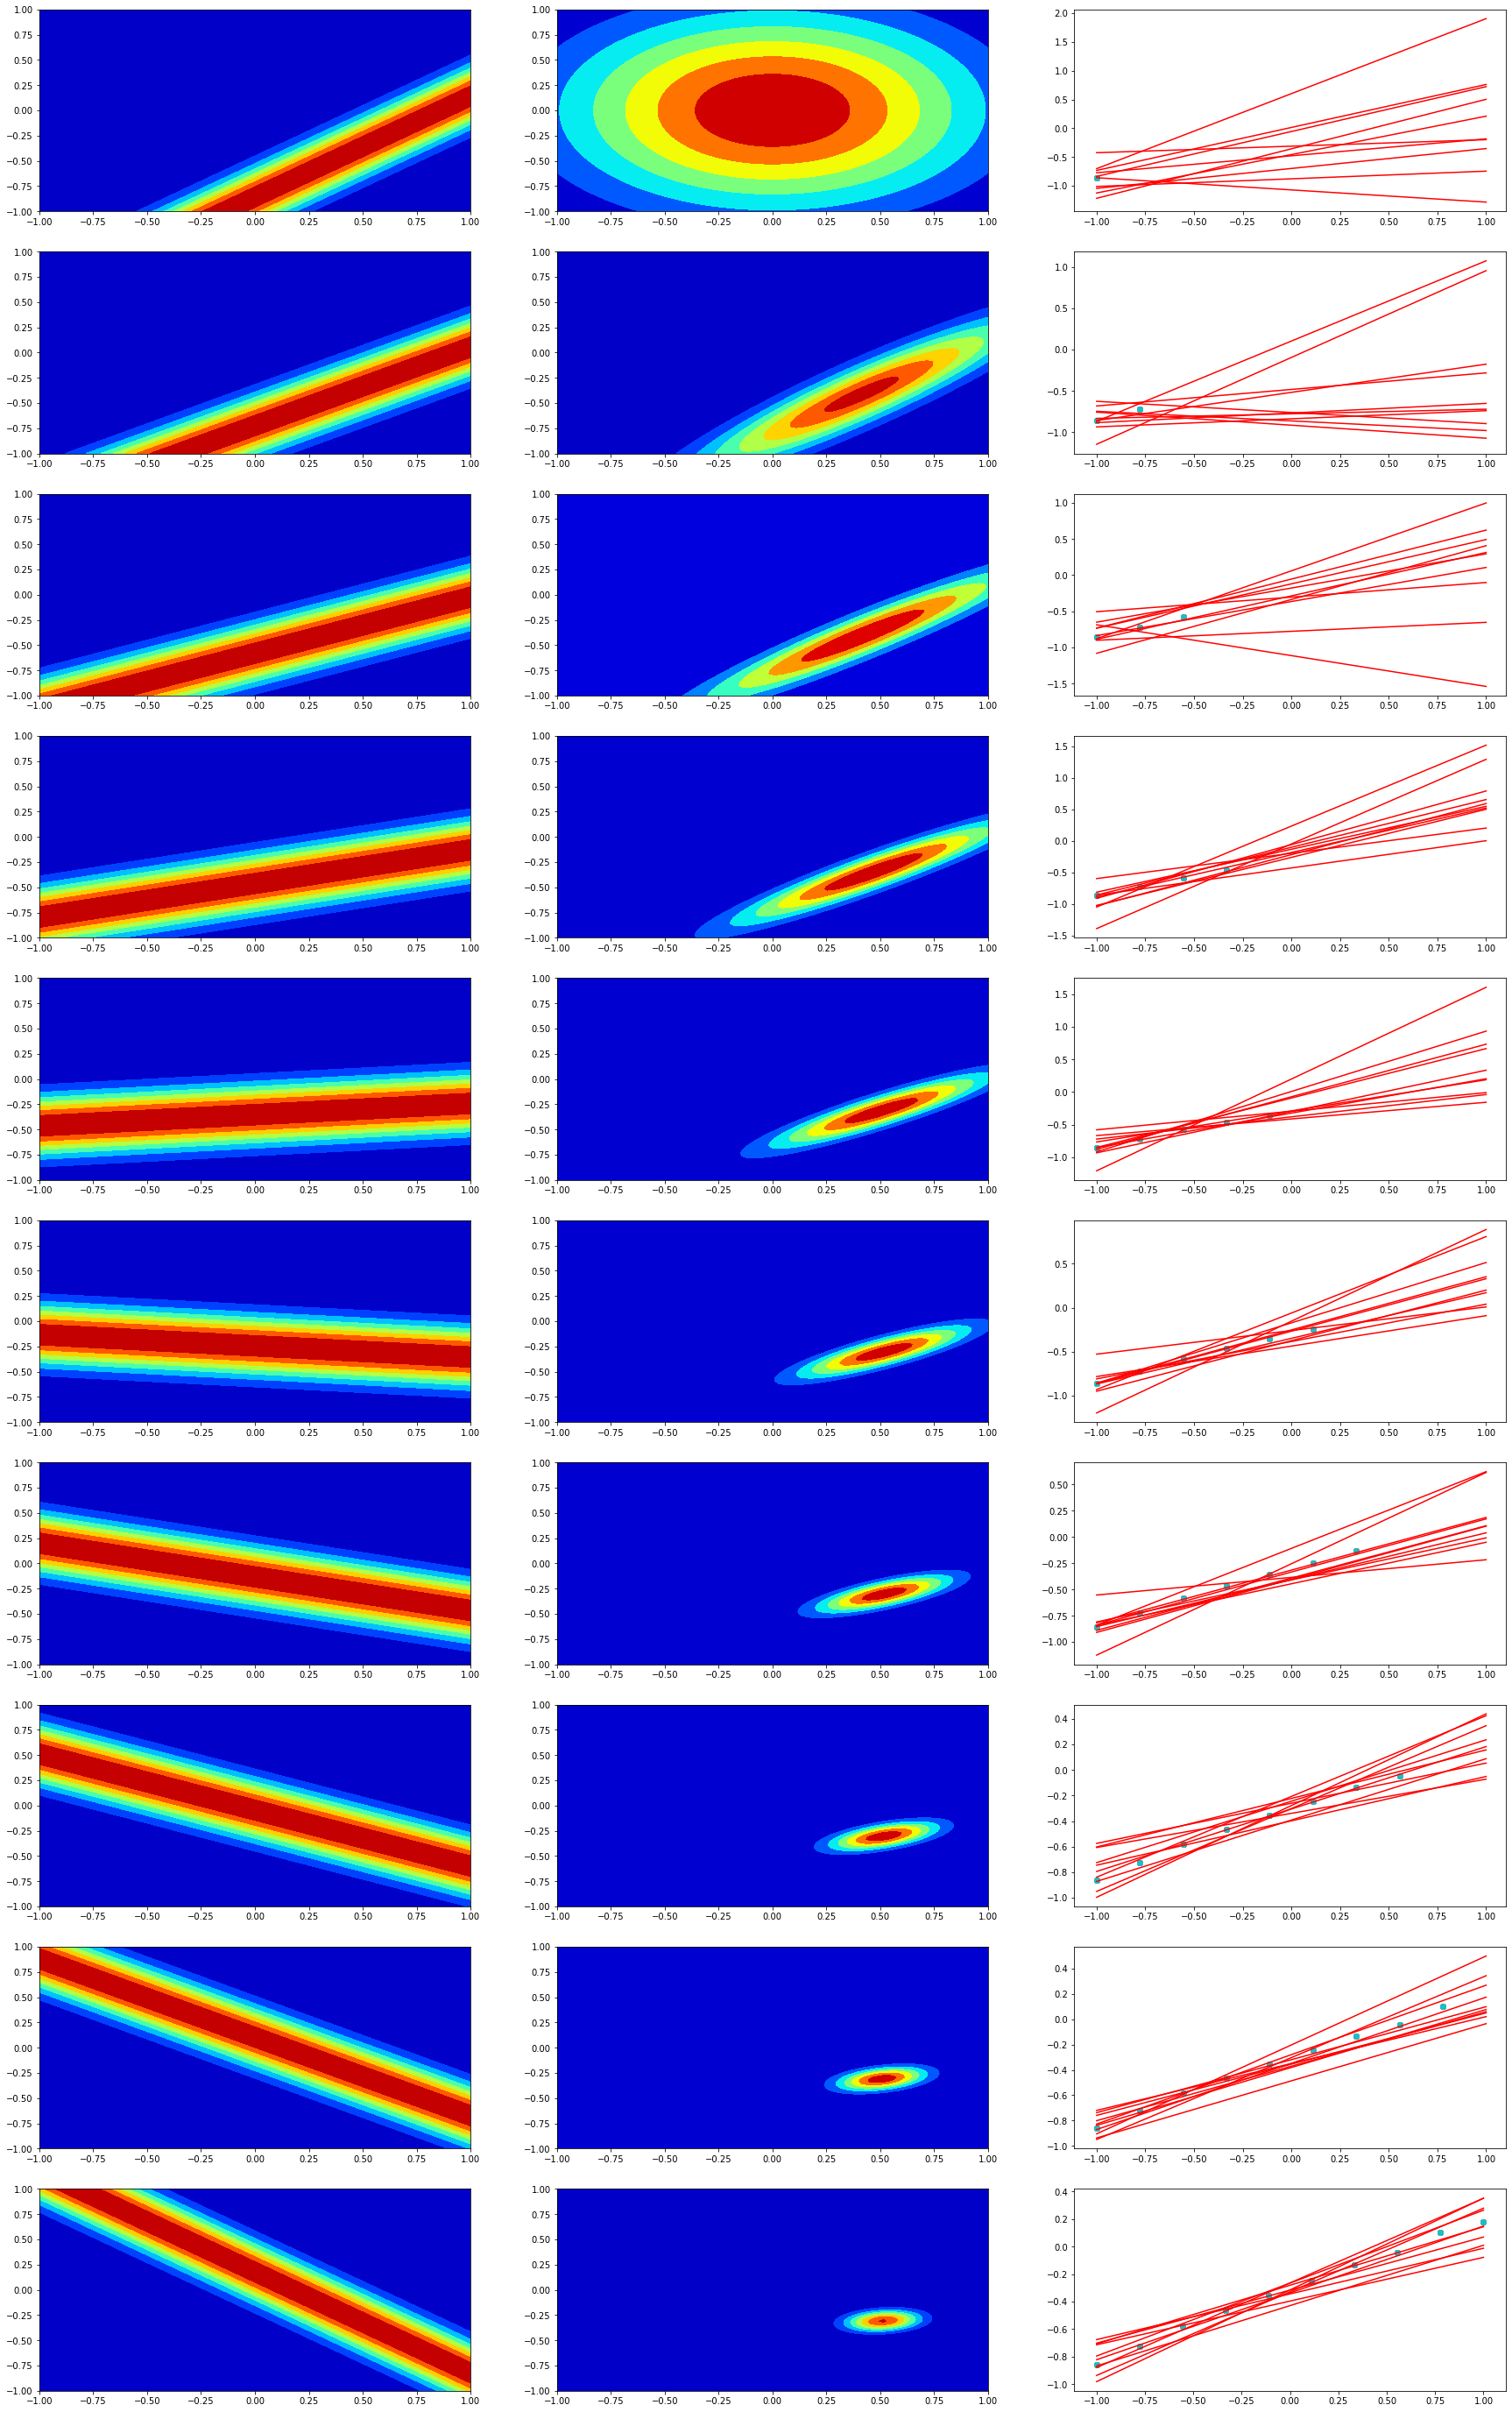

In [33]:
fig = plt.figure()
m0=np.array([0,0])
s0=[[0.5,0],[0,0.5]]
prior_grid=priorGridCalc(a0_values,a1_values,0,0.5)
prior_grid
count=0
x_points=np.linspace(-1,1,10)
fig,axs= plt.subplots(10,3,figsize=(30,50))
for i in range(len(x)):
    x_sub=[x[i]]
    y_sub=[y[i]]
    x_total=x[:i+1]
    y_total=y[:i+1]
    phi =[1,x[i]]
    likelihood_grid=likelihoodGridCalc(a0_values,a1_values,x_sub,y_sub)
    posterior_grid=posteriorGridCalc(prior_grid,likelihood_grid)
    a0,a1,mn,sn=getRandomLines(m0,s0,25,phi,y_sub)
    axs[count,0].contourf(a0_values,a1_values,likelihood_grid,cmap="jet")
    axs[count,1].contourf(a0_values,a1_values,prior_grid,cmap="jet")
    for i in range(len(a0)):
        axs[count,2].plot(x_points,a0[i]+a1[i]*x_points,color="red")
        axs[count,2].scatter(x_total,y_total)
    m0=mn
    s0=sn
    prior_grid=posterior_grid
    count+=1
plt.savefig("Bayesian_Regression.png")